In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import zipfile

# This section is to suppresses warnings generated by the code:
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [2]:
mall_file = 'Mall_Customers.csv'    # This is the specific file we want to read
df = pd.read_csv(mall_file)  

In [3]:
# Display the first five rows of the dataset
print(f'first five rows of the dataset are\n {df.head()}')

first five rows of the dataset are
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Display basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Display the shape of the Dataframe
print("\n shape of the dataset:")
print(df.shape)


 shape of the dataset:
(200, 5)


In [6]:
# Check for missing values
print("\n Missing values in dataset are:")
print(df.isnull().sum())


 Missing values in dataset are:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Checking for null values
print(f'Dataframe after dropping the null values\n {df.dropna()}')

Dataframe after dropping the null values
      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [8]:
# Checking for duplicate avlues
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [9]:
# Checking for the datatypes of the columns
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
# Summary satistics to undersatnd range of values
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
# Data preprocessing
# Selecting relevant columns(Age,Annual,Income (k$),Spending Score (1-100))
featured_columns = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']]   # We assume this columns for clustering
print(featured_columns)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [33]:
# Standardize the data
scalar = StandardScaler()
scaled_features = scalar.fit_transform(featured_columns)

In [14]:
# Displaying the first gew rows of scaled_faetures
print(f' First five rows of scaled_faetures:\n{scaled_features[:5]}')

 First five rows of scaled_faetures:
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


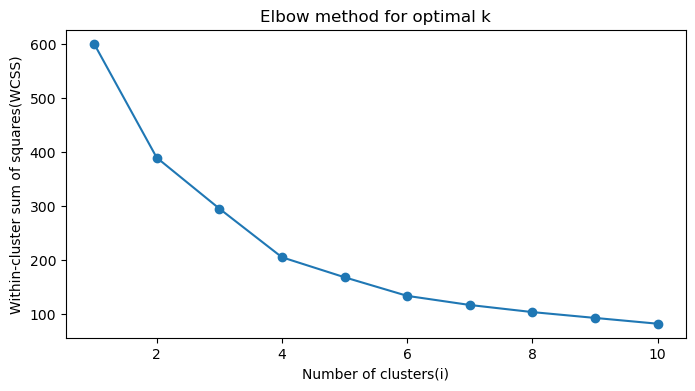

In [34]:
# Elbow method to find optimal number of clusters
WCSS=[]  # WCSS = Within-cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_features)
    WCSS.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(8,4))
plt.plot(range(1,11),WCSS, marker='o')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of clusters(i)')
plt.ylabel('Within-cluster sum of squares(WCSS)')
plt.show()

In [16]:
# Silhouette score for evaluation
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.33547192894004574
For n_clusters=3, the silhouette score is 0.357793388710272
For n_clusters=4, the silhouette score is 0.4039582785148566
For n_clusters=5, the silhouette score is 0.41664341513732767
For n_clusters=6, the silhouette score is 0.4284167762892593
For n_clusters=7, the silhouette score is 0.417231894954916
For n_clusters=8, the silhouette score is 0.4082067042807375
For n_clusters=9, the silhouette score is 0.41769250624076476
For n_clusters=10, the silhouette score is 0.40655411010117015


In [17]:
# Perform k-means clustering with optimal k(from the elbow method) assume k =3
optimal_k =3
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add labels to the origonal dataset
df['cluster'] = cluster_labels

# Display the first five rows of cluster_labels
print(f"First five rows of cluster lables is:\n{df.head()}")

First five rows of cluster lables is:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


In [18]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

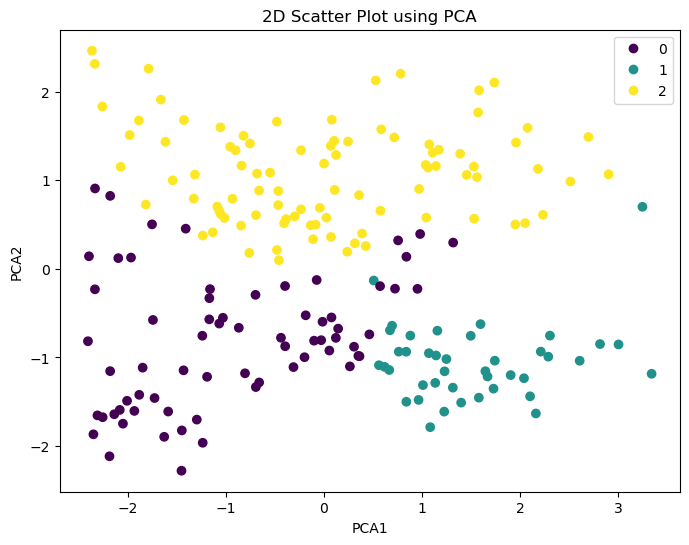

In [20]:
# Data Vizualization 
# Creating visualizations to reprents clusters
# Separate features and cluster labels
x = df.drop(columns=['cluster','Gender'])
y = df['cluster']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Perform PCA(Principal Component Analysis)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])  # Create a DataFrame with the PCA results

pca_df['cluster'] = y

# Plot the PCA results to reduce dimentions to Two vizualizations
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'], cmap='viridis')
plt.title('2D Scatter Plot using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(handles=scatter.legend_elements()[0], labels=set(pca_df['cluster']))
plt.show()


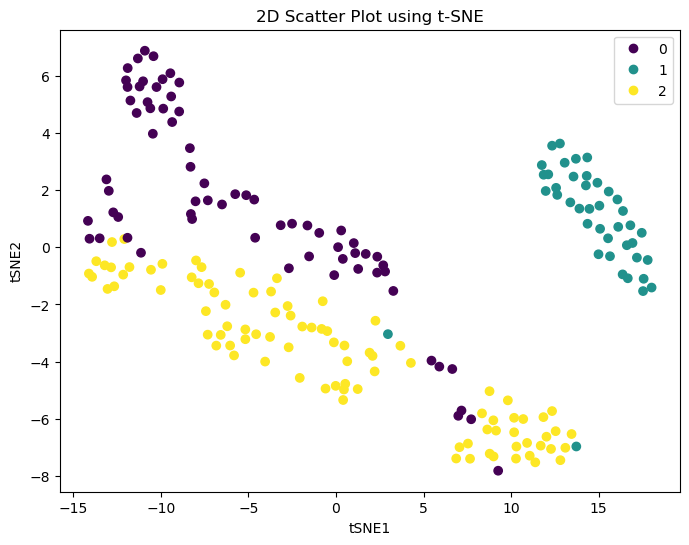

In [21]:
# Performing t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(x)

tsne_df = pd.DataFrame(data=tsne_result, columns=['tSNE1', 'tSNE2'])  # Creating the dataframe with the t-SNE results
tsne_df['cluster'] = y

# visualizing  the t-SNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c=tsne_df['cluster'], cmap='viridis')
plt.title('2D Scatter Plot using t-SNE')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(handles=scatter.legend_elements()[0], labels=set(tsne_df['cluster']))
plt.show()

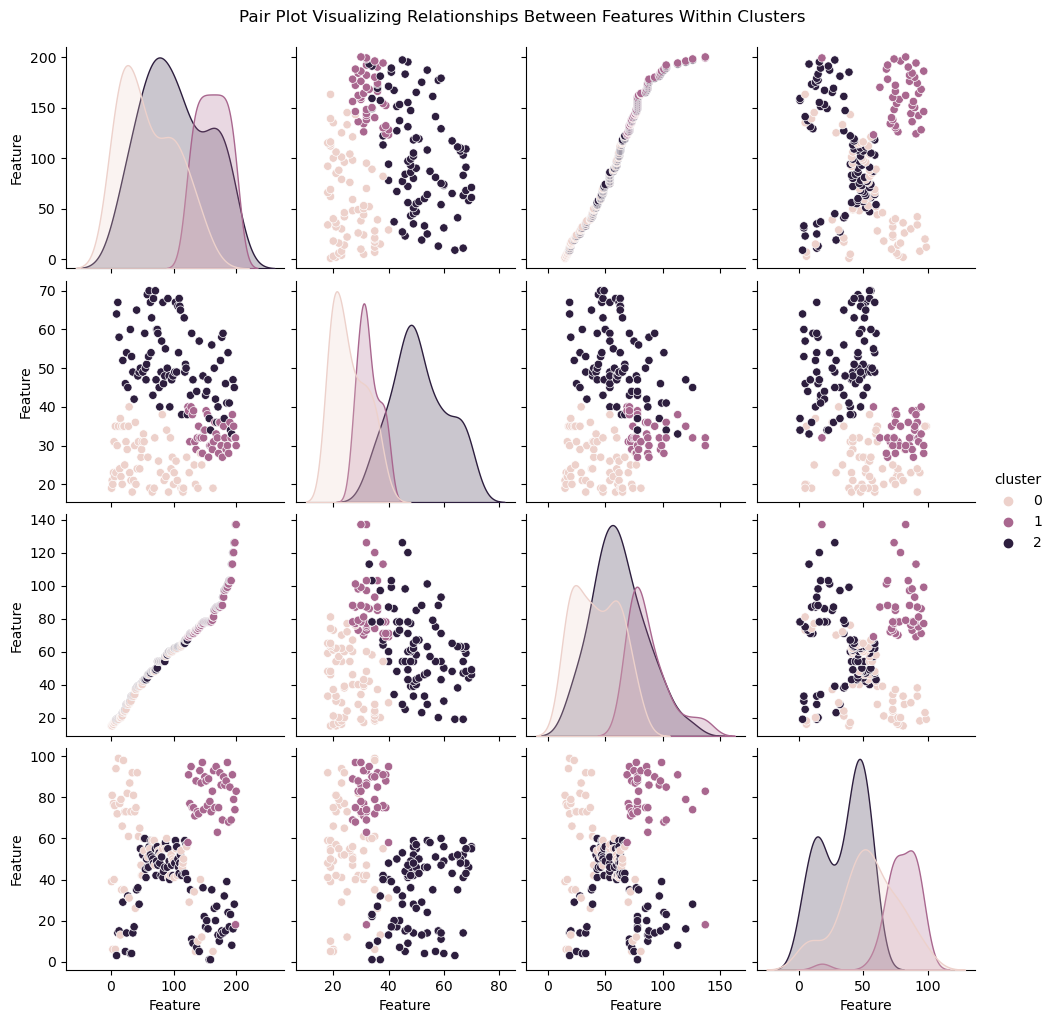

In [22]:
# Create a pair plot with clustering
pair_plot = sns.pairplot(df, hue='cluster', diag_kind='kde')

# Adding  titles and labels to the plots
pair_plot.fig.suptitle('Pair Plot Visualizing Relationships Between Features Within Clusters', y=1.02)
pair_plot.set(xlabel='Feature', ylabel='Feature')
plt.show()  # Show the plot

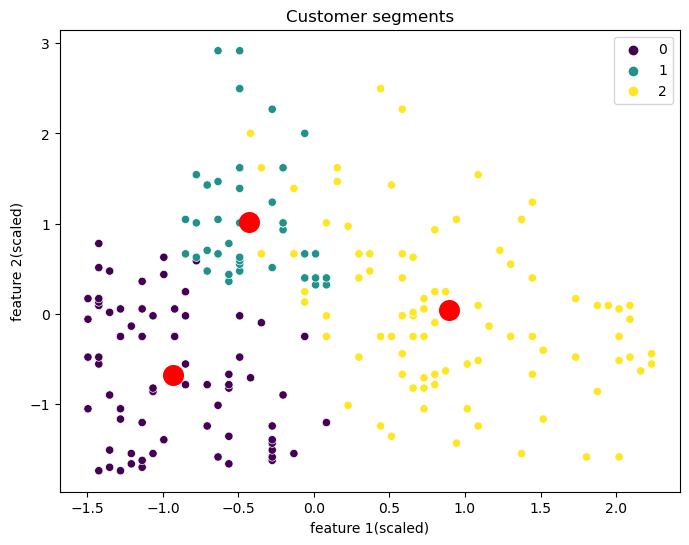

In [23]:
# Data Vizualization
# Vizualize clusters (using first two faetures for plotting)
plt.figure(figsize=(8, 6))
sns.scatterplot(x = scaled_features[:,0], y = scaled_features[:,1],hue =cluster_labels, palette ='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,c='red',label='centriods')
plt.title('Customer segments')
plt.xlabel('feature 1(scaled)')
plt.ylabel('feature 2(scaled)')
plt.show()